In [2]:
import import_ipynb

In [10]:
import pandas as pd
import os, sys
import re
from konlpy.tag import Kkma, Okt
from tqdm import tqdm

importing Jupyter notebook from sentiment_analysis.ipynb


<string>:1: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:2: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:3: FutureWarning: The default value of regex will change from True to False in a future version.
100%|███████████████████████████████████████████████████████████████████████████| 48852/48852 [07:57<00:00, 102.38it/s]


단어 집합(vocabulary)의 크기 : 43770
등장 빈도가 9번 이하인 희귀 단어의 수: 34608
단어 집합에서 희귀 단어의 비율: 79.06785469499657
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.252908861364179
단어 집합의 크기 : 9163


C:\Users\20191\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


144991
144991
전체 샘플 중 길이가 30 이하인 샘플의 비율: 91.9995034174535
Epoch 1/10
1813/1813 [==============================] - ETA: 0s - loss: 0.4121 - acc: 0.8090
Epoch 1: val_acc improved from -inf to 0.83606, saving model to best_model.h5
1813/1813 [==============================] - 237s 124ms/step - loss: 0.4121 - acc: 0.8090 - val_loss: 0.3739 - val_acc: 0.8361
Epoch 2/10
1813/1813 [==============================] - ETA: 0s - loss: 0.3480 - acc: 0.8476
Epoch 2: val_acc improved from 0.83606 to 0.84672, saving model to best_model.h5
1813/1813 [==============================] - 196s 108ms/step - loss: 0.3480 - acc: 0.8476 - val_loss: 0.3496 - val_acc: 0.8467
Epoch 3/10
1813/1813 [==============================] - ETA: 0s - loss: 0.3231 - acc: 0.8606
Epoch 3: val_acc improved from 0.84672 to 0.85241, saving model to best_model.h5
1813/1813 [==============================] - 199s 110ms/step - loss: 0.3231 - acc: 0.8606 - val_loss: 0.3374 - val_acc: 0.8524
Epoch 4/10
1813/1813 [====================

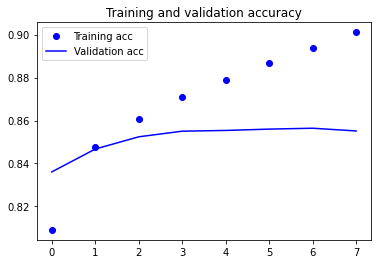

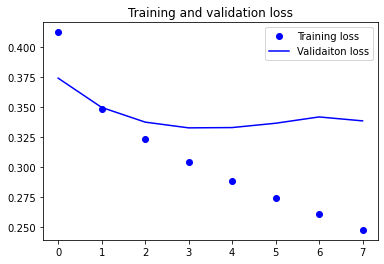

In [4]:
from sentiment_analysis import sentiment_predict

In [11]:
BASE_DIR = os.getcwd()
okt = Okt()

In [13]:
df = pd.read_csv(BASE_DIR+'/crawling/mock.csv', encoding='cp949')
df

,id,review
0,913mr,????? 감동을 주는 꾸준한 울림?-지난밤 넷플릭스에서 새로 나온 <에놀라 홈즈2...
1,913mr,쓰고 연기천재들 총집합이라고 읽으면 되는 부분...? (입틀막)진짜 캐아일체라는 말...
2,913mr,75% 할인 받고 원하는 OTT 구독 ! 정산 스트레스 받을 필요 없이 한 자리라도...
3,913mr,"위의 포뇨(2008) ★★★☆-미야자키 하야오 감독 / 포뇨(브륀힐트), 소스케, ..."
4,913mr,"수 없는 비밀(2007) ★★★-주걸륜 감독 / 주걸륜(예샹룬), 계륜미(루샤오위)..."
5,913mr,우리 'OTT 쉐어' 하자 ! 최대 75% 할인 받고 원하는 OTT 구독정산 스트레...
6,913mr,"★★★★-이창동 감독 / 유아인(이종수), 스티븐연(벤), 전종서(신해미)갈 길을 ..."
7,913mr,미로-오필리아와 세 개의 열쇠(2006) ★★★☆-기예르모 델 토로 감독 / 이바나...
8,913mr,"훗날 우리(2018) ★★★☆-유약영 감독 / 주동우(팡샤오샤오), 정백연(린젠칭)..."
9,913mr,액션을 넘 좋아하는데이런 ??사운드 테러 액션은 처음이에요!영화관 큰 스크린을 통해...


In [14]:
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-14-72d6d88fcea9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [15]:
df

,id,review
0,913mr,감동을 주는 꾸준한 울림지난밤 넷플릭스에서 새로 나온 에놀라 홈즈를 보았다 전작인...
1,913mr,쓰고 연기천재들 총집합이라고 읽으면 되는 부분 입틀막진짜 캐아일체라는 말은 데시벨을...
2,913mr,할인 받고 원하는 구독 정산 스트레스 받을 필요 없이 한 자리라도 공유하면 매...
3,913mr,위의 포뇨 미야자키 하야오 감독 포뇨브륀힐트 소스케 리사 후지모토 그랑 맘마레화면...
4,913mr,수 없는 비밀 주걸륜 감독 주걸륜예샹룬 계륜미루샤오위 황추생예샹룬 아버지그녀가 남...
5,913mr,우리 쉐어 하자 최대 할인 받고 원하는 구독정산 스트레스 받을 필요 없이 남...
6,913mr,이창동 감독 유아인이종수 스티븐연벤 전종서신해미갈 길을 잃은 청춘들의 현주소 목적...
7,913mr,미로오필리아와 세 개의 열쇠 기예르모 델 토로 감독 이바나 바쿠에로오필리아 더그 ...
8,913mr,훗날 우리 유약영 감독 주동우팡샤오샤오 정백연린젠칭 톈좡좡린젠칭의 아버지앞서 나가...
9,913mr,액션을 넘 좋아하는데이런 사운드 테러 액션은 처음이에요영화관 큰 스크린을 통해서 보...


In [16]:
#긍정 +1, 부정 -1
def sentiment_predict_user():
    empty = []
    score = 0
    for i in tqdm(range(len(df))):
        pos_neg = ''      
        pos_neg = sentiment_predict(df.review[i])

        if '긍정' in pos_neg:
            score += 1
        elif '부정' in pos_neg:
            score -= 1
        else:
            continue
    #     print(reviews.movie[i], score/len(reviews.reviews[i]))
    empty.append((df.id[0], score/len(df)))
    return empty

In [17]:
user_score = sentiment_predict_user()[0][1]

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  5%|████▏                                                                              | 1/20 [00:04<01:17,  4.09s/it]

1/1 [==============================] - 0s 59ms/step


 10%|████████▎                                                                          | 2/20 [00:04<00:33,  1.86s/it]

1/1 [==============================] - 0s 64ms/step


 15%|████████████▍                                                                      | 3/20 [00:04<00:18,  1.11s/it]

1/1 [==============================] - 0s 58ms/step


 20%|████████████████▌                                                                  | 4/20 [00:04<00:12,  1.31it/s]

1/1 [==============================] - 0s 52ms/step


 25%|████████████████████▊                                                              | 5/20 [00:05<00:08,  1.74it/s]

1/1 [==============================] - 0s 52ms/step


 30%|████████████████████████▉                                                          | 6/20 [00:05<00:06,  2.28it/s]

1/1 [==============================] - 0s 55ms/step


 35%|█████████████████████████████                                                      | 7/20 [00:05<00:04,  2.68it/s]

1/1 [==============================] - 0s 65ms/step


 40%|█████████████████████████████████▏                                                 | 8/20 [00:05<00:04,  2.95it/s]

1/1 [==============================] - 0s 55ms/step


 45%|█████████████████████████████████████▎                                             | 9/20 [00:05<00:03,  3.27it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████████████████████████████████████████                                         | 10/20 [00:06<00:02,  3.67it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████████████████████████████████████████████                                     | 11/20 [00:06<00:02,  4.04it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:06<00:01,  4.25it/s]

1/1 [==============================] - 0s 61ms/step


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:06<00:01,  4.52it/s]

1/1 [==============================] - 0s 58ms/step


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:06<00:01,  4.58it/s]

1/1 [==============================] - 0s 50ms/step


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:07<00:01,  4.40it/s]

1/1 [==============================] - 0s 58ms/step


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:07<00:00,  4.62it/s]

1/1 [==============================] - 0s 55ms/step


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:07<00:00,  4.35it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:07<00:00,  4.55it/s]

1/1 [==============================] - 0s 71ms/step


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:08<00:00,  4.40it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.40it/s]


In [18]:
movies = pd.read_csv('./csv/reviews.csv',)

In [19]:
movies = movies.sort_values(ascending=False,by='score')

In [20]:
recommend = movies.loc[(movies['score'] >= user_score) & (movies['people'] >= 10)]

In [21]:
recommend

,movies,score,people
66,슬럼버랜드,0.904762,21
15,기예르모 델토로의 피노키오,0.882353,17
102,창밖은 겨울,0.882353,17
8,그녀가 말했다,0.760000,25
88,요정,0.750000,40
124,헤어질 결심,0.750000,48
110,탄생,0.748379,771
86,올빼미,0.747755,2450
